In [37]:
import numpy as np
import matplotlib.pyplot as plt
import fourier_lib as fourier
import window_lib as wd

In [38]:
# array initialize

Fs = 1000          # sampling frequency
Ts = 1/Fs          # time interval between samples
T = 0.01              # period of harmonic

x_start = 0
x_end = 1
X = np.linspace(x_start, x_end, num=(x_end - x_start)*Fs, endpoint=False)/100
N_freq = np.array(range(200))       # number of frequency components

F_domain = N_freq/T

Text(1, 0, 'time(s)')

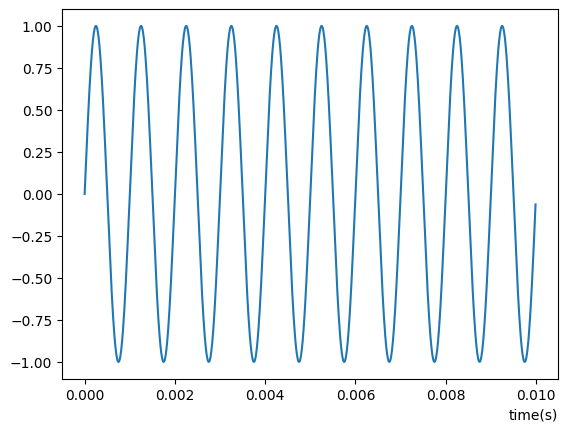

In [51]:
# Y = np.sin(2*np.pi*X) + 0.5*np.random.rand()*np.sin(2*np.pi*X*5) + 0.2*np.random.rand()*np.sin(2*np.pi*X*9)
# Y = np.sign(np.sin(2*np.pi*200*X))
Y = np.sin(2*np.pi*1000*X)

plt.plot(X,Y)
plt.xlabel("time(s)", loc="right")

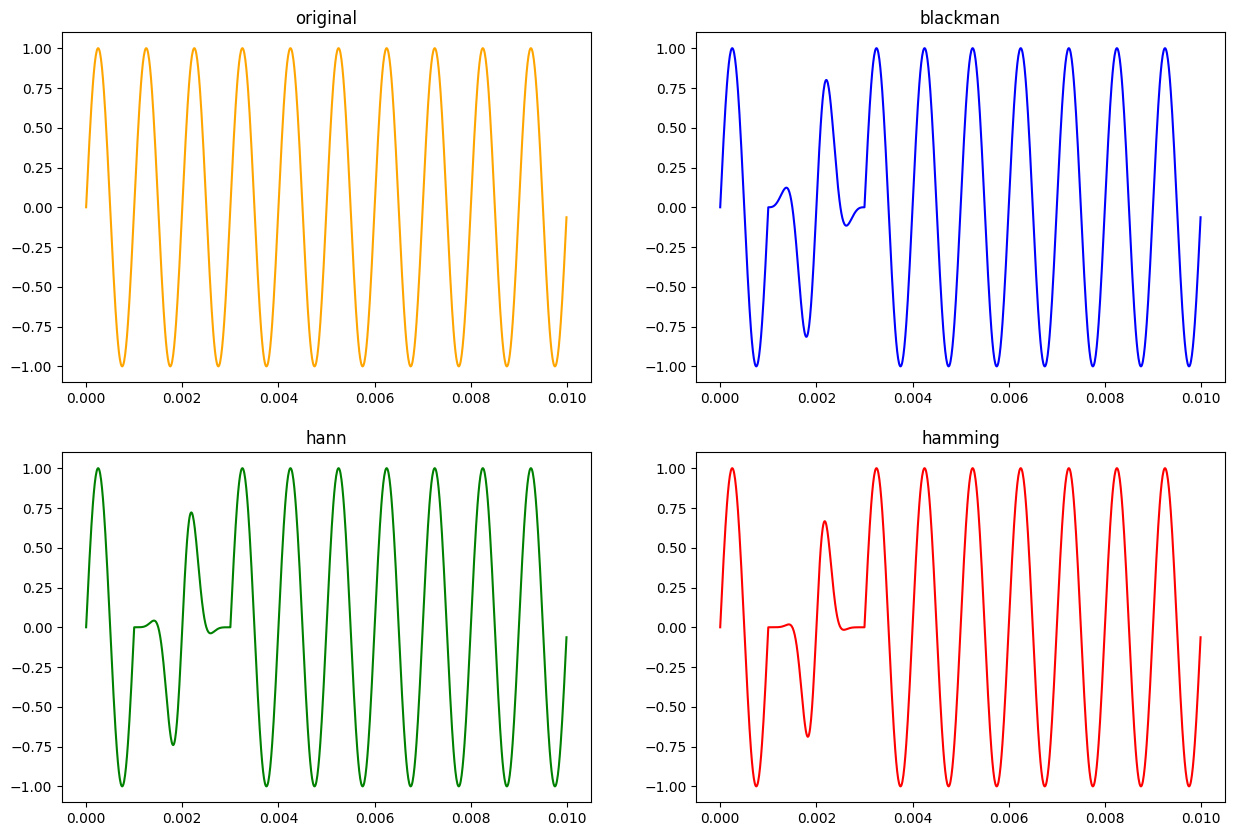

In [52]:
plt.figure(figsize=(15,10))
color_list = ['orange','blue','green','red']
title_list = ['original','blackman','hann','hamming']

for i in range(4):
    Y_w = Y
    match i:
        case 0:
            plt.subplot(2,2,i+1)
            plt.plot(X,Y, color=color_list[i])
            plt.title(title_list[i])
        case 1:
            Y_w[100:300] = wd.windowing(Y_w[100:300], wd.blackman(200, 0.16))
            plt.subplot(2,2,i+1)
            plt.plot(X,Y_w, color=color_list[i])
            plt.title(title_list[i])
        case 2:
            Y_w[100:300] = wd.windowing(Y_w[100:300], wd.hann(200))
            plt.subplot(2,2,i+1)
            plt.plot(X,Y_w, color=color_list[i])
            plt.title(title_list[i])
        case 3:
            Y_w[100:300] = wd.windowing(Y_w[100:300], wd.hamming(200))
            plt.subplot(2,2,i+1)
            plt.plot(X,Y_w, color=color_list[i])
            plt.title(title_list[i])

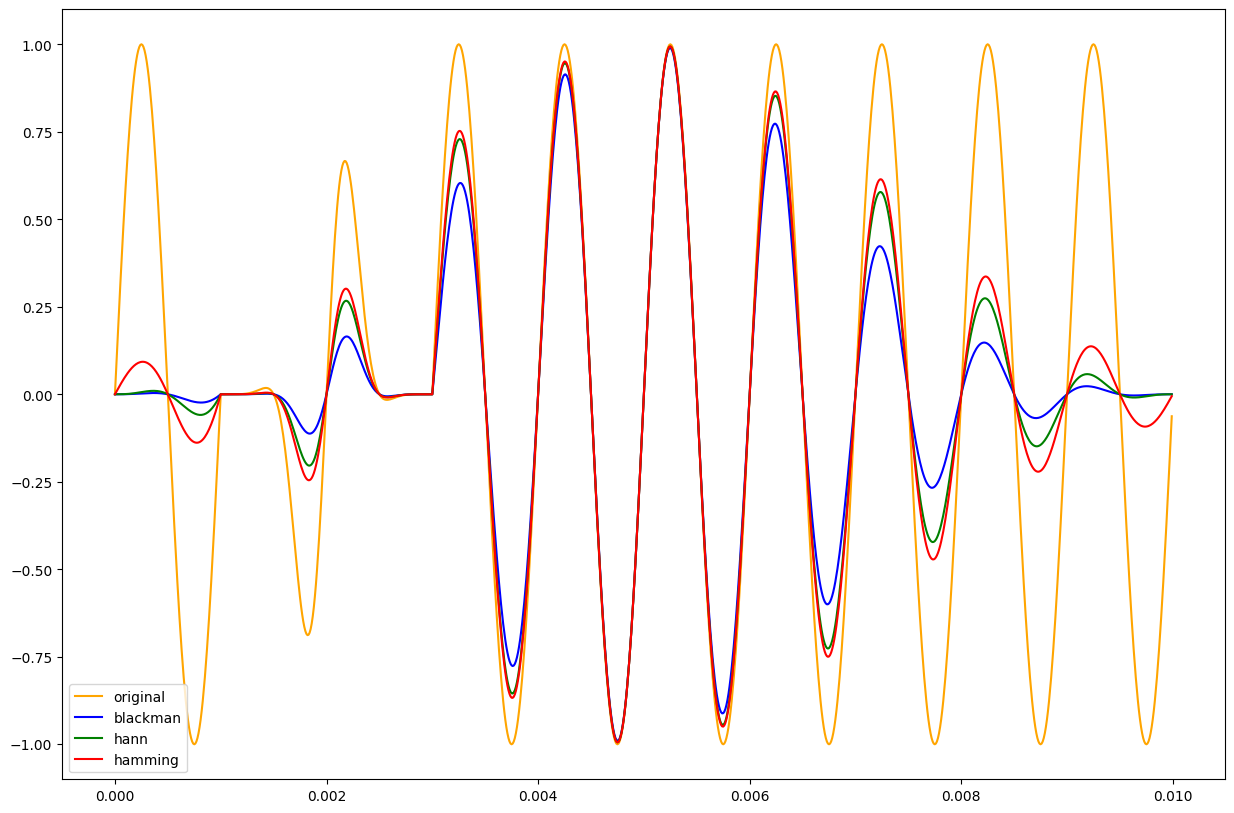

In [53]:
plt.figure(figsize=(15,10))

for i in range(4):
    match i:
        case 0:
            plt.plot(X,Y, color=color_list[i], label=title_list[i])
        case 1:
            Y_w = wd.windowing(Y, wd.blackman(Fs, 0.16))
            plt.plot(X,Y_w, color=color_list[i], label=title_list[i])
        case 2:
            Y_w = wd.windowing(Y, wd.hann(Fs))
            plt.plot(X,Y_w, color=color_list[i], label=title_list[i])
        case 3:
            Y_w = wd.windowing(Y, wd.hamming(Fs))
            plt.plot(X,Y_w, color=color_list[i], label=title_list[i])
plt.legend()

In [54]:
Z = fourier.fourier_series_spectrum(X,Y,N_freq,T/2)

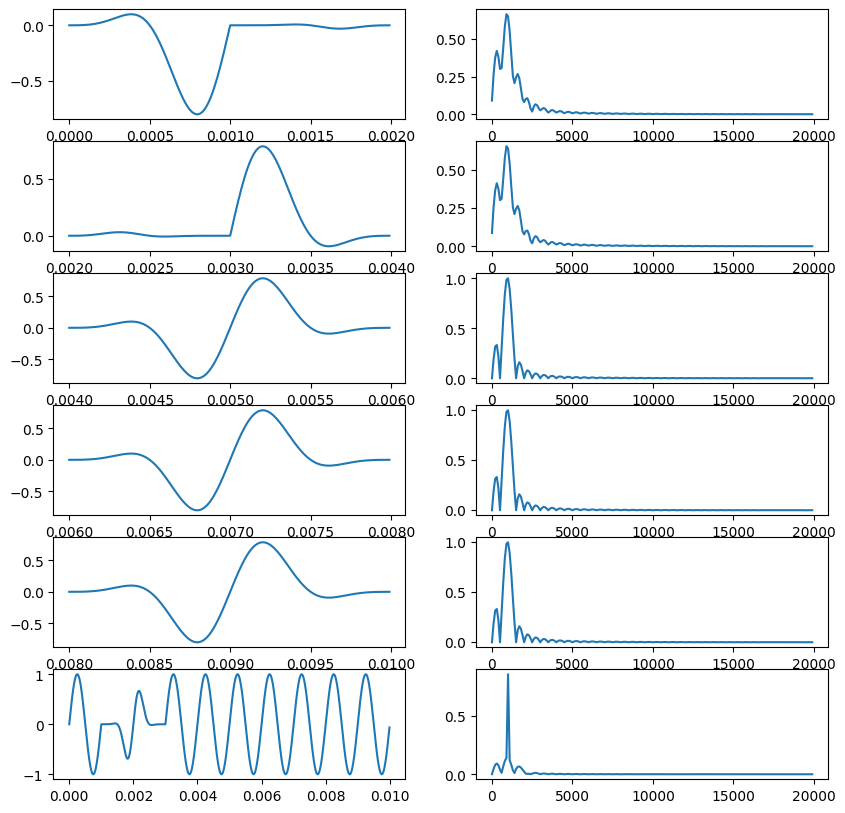

In [55]:
plt.figure(figsize=(10,10))

n = 200
for i in range(5):
    y_blackman = wd.windowing(Y[i*200:n+i*200], wd.blackman(n, 0.2))
    f_blackman = fourier.fourier_series_spectrum(X[i*200:n+i*200], Y[i*200:n+i*200], N_freq, T/2)

    plt.subplot(6,2,(i+1)*2-1)
    plt.plot(X[i*200:n+i*200], y_blackman)

    plt.subplot(6,2,(i+1)*2)
    plt.plot(F_domain,f_blackman)

plt.subplot(6,2,11)
plt.plot(X,Y)
plt.subplot(6,2,12)
plt.plot(F_domain,Z)